# CPSC483-06 #
# Jupyter Notebook for dataset preprocessing of 'dreams' dataset #
Dulce Funez Chinchilla, Drashti Mehta, Erika Dickson


In [50]:
#Import statements
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from scipy import stats

In [51]:
dreams = pd.read_csv('dreams_dataset.csv')
print(dreams.shape)
dreams.head(10)

(21000, 21)


,dream_id,dreamer,description,dream_date,dream_language,text_dream,characters_code,emotions_code,aggression_code,friendliness_code,...,Male,Animal,Friends,Family,Dead&Imaginary,Aggression/Friendliness,A/CIndex,F/CIndex,S/CIndex,NegativeEmotions
0,1,alta,Alta: a detailed dreamer,1957,en,"The one at the Meads's house, where it's bigge...","2ISA, 1MKA, 1FDA, 1IOA, 2ISA",NaN,2IKA > Q,2IKA 4> Q,...,0.500000,0.000000,0.200000,0.200000,0.0,0.000000,0.200000,0.200000,0.0,0.0
1,2,alta,Alta: a detailed dreamer,8/11/1967,en,I'm at a family reunion in a large fine house ...,"2ISA, people, 2ISA",SD 2IKA,"D > Q, Q > 2ISA",NaN,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.666667,0.000000,0.0,1.0
2,3,alta,Alta: a detailed dreamer,8/1/1985,en,I watch a plane fly past and shortly realize i...,"2ISA, 2ISA, 1FSA, 1MBA, 1IOA, 2ISA, 2FDA","SD 1ISA, AP D, AP D","It PRP >, It PRP >, D > 1FKA",NaN,...,0.333333,0.000000,0.000000,0.285714,0.0,1.000000,0.428571,0.000000,0.0,1.0
3,4,alta,Alta: a detailed dreamer,1985?,en,Me pulling the green leaves and berries off so...,"1MAA, 1FMA, 2ISA, 2IKA, 1ANI, 1ANI, 1IOA, 2ISA...","SD 2ISA, SD D","Q > Q, 2ISA > Q, 2ISA > Q, D > 1MSA","1IKA 4> Q, 2ISA 4> 2ISA",...,0.666667,0.176471,0.142857,0.142857,0.0,1.000000,0.235294,0.117647,0.0,1.0
4,5,alta,Alta: a detailed dreamer,1985?,en,I'm in a room that reminds me of (but definite...,"1IRA, 1MSA, 1ISA, 2ISA, 1ISA, 1IKA","AP D, AP D, AP 1MSA, CO D, SD D, AP D","1MSA > D, Q > Q, D > 2IKA, D > 2IKA, D > 1MSA,...",D 4> Q,...,1.000000,0.000000,0.166667,0.166667,0.0,0.875000,1.333333,0.166667,0.0,1.0
5,6,alta,Alta: a detailed dreamer,1985?,en,Living next door to Loretta in an apartment - ...,"1FSA, 2ISA, 1FDA, 1IIC",HA 1FSA,D > 2IKA,NaN,...,0.000000,0.000000,0.000000,0.500000,0.0,1.000000,0.250000,0.000000,0.0,0.0
6,7,alta,Alta: a detailed dreamer,1985?,en,Kidnapped - I'm on my way somewhere else (by c...,"2ISA, 2IOA, 1IOA, 1ISA, 2IKA, 2ISA, 2ISA","AN 1ISA, AN D, SD 2ISA, AN D","Q > 2IKA, D > 2ISA, D > Q, 2IKA > D, D > Q, 1I...",NaN,...,0.000000,0.000000,0.142857,0.000000,0.0,1.000000,1.571429,0.000000,0.0,1.0
7,8,alta,Alta: a detailed dreamer,1985?,en,"I'm alone in an apartment - old place, inside ...","2ISA, 1ISA, 1ISA","AP D, SD D","D > D, 1MSA > D, 1MSA > D, D > 1MSA, D > D, D ...",D 4> D,...,0.000000,0.000000,0.000000,0.000000,0.0,0.888889,2.666667,0.333333,0.0,1.0
8,9,alta,Alta: a detailed dreamer,1985?,en,I'm somewhere with a friend I don't want to be...,"1IKA, stepfather, 1ISB, 1MSA",NaN,D > Q,NaN,...,1.000000,0.000000,0.250000,0.000000,0.0,1.000000,0.250000,0.000000,0.0,0.0
9,10,alta,Alta: a detailed dreamer,1985?,en,"I am in some public place, reminds me of the g...","2ISA, 1MKA",NaN,NaN,NaN,...,1.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0


In [52]:
#Add an additional column 'gender' for the gender of the dreamer, place it in index 2, intialize with 'n/a'
#Column 'gender' will be used for data analysis and later conclusion drawing
dreams.insert(2, 'gender', 'n/a')

In [53]:
#Update the gender column to have dreamer gender as numeric binary
#Female: 1
#Male: 0
dreamer_gender = {
    'alta' : '1',
    'angie' : '1',
    'arlie' : '1',
    'b' : '1',
    'b2' : '1',
    'bay_area_girls_456' : '1',
    'bay_area_girls_789' : '1',
    'bea1' : '1',
    'bea2' : '1',
    'blind-f' : '1',
    'blind-m' : '0',
    'bosnak' : '0',
    'chris' : '0',
    'chuck' : '0',
    'dahlia' : '1',
    'david' : '0',
    'dorothea' : '1',
    'ed' : '0',
    'edna' : '1',
    'elizabeth' : '1',
    'emma' : '1',
    'emmas_husband' : '0',
    'esther' : '1',
    'hall_female' : '1',
    'norms-f' : '1',
    'izzy' : '1',
    'jasmine1' : '1',
    'jasmine2' : '1',
    'jasmine3' : '1',
    'jasmine4' : '1',
    'jeff' : '0',
    'joan' : '1',
    'kenneth' : '0',
    'lawrence' : '0',
    'mack' : '0',
    'madeline1-hs' : '1',
    'madeline2-dorms' : '1',
    'madeline3-offcampus' : '1',
    'madeline4-postgrad' : '1',
    'mark' : '0',
    'melissa' : '1',
    'melora' : '1',
    'melvin' : '0',
    'merri' : '1',
    'miami-home' : '0',
    'miami-lab' : '0',
    'midwest_teens-f' : '1',
    'midwest_teens-m' : '0',
    'nancy' : '1',
    'natural_scientist' : '0',
    'norman' : '0',
    'wedding' : '1',
    'norms-m' : '0',
    'pegasus' : '0',
    'peru-f' : '1',
    'peru-m' : '0',
    'phil1' : '0',
    'phil2' : '0',
    'phil3' : '0',
    'physiologist' : '0',
    'ringo' : '0',
    'samantha' : '1',
    'seventh_graders' : '1',
    'toby' : '0',
    'tom' : '0',
    'ucsc_women' : '1',
    'vickie' : '1',
    'vietnam_vet' : '0',
    'vietnam_vet2' : '0',
    'west_coast_teens' : '1',
}

for key, val in dreamer_gender.items():
    dreams.loc[dreams['dreamer'] == key, 'gender'] = val

dreams.head(5)


,dream_id,dreamer,gender,description,dream_date,dream_language,text_dream,characters_code,emotions_code,aggression_code,...,Male,Animal,Friends,Family,Dead&Imaginary,Aggression/Friendliness,A/CIndex,F/CIndex,S/CIndex,NegativeEmotions
0,1,alta,1,Alta: a detailed dreamer,1957,en,"The one at the Meads's house, where it's bigge...","2ISA, 1MKA, 1FDA, 1IOA, 2ISA",NaN,2IKA > Q,...,0.500000,0.000000,0.200000,0.200000,0.0,0.000,0.200000,0.200000,0.0,0.0
1,2,alta,1,Alta: a detailed dreamer,8/11/1967,en,I'm at a family reunion in a large fine house ...,"2ISA, people, 2ISA",SD 2IKA,"D > Q, Q > 2ISA",...,0.000000,0.000000,0.000000,0.000000,0.0,1.000,0.666667,0.000000,0.0,1.0
2,3,alta,1,Alta: a detailed dreamer,8/1/1985,en,I watch a plane fly past and shortly realize i...,"2ISA, 2ISA, 1FSA, 1MBA, 1IOA, 2ISA, 2FDA","SD 1ISA, AP D, AP D","It PRP >, It PRP >, D > 1FKA",...,0.333333,0.000000,0.000000,0.285714,0.0,1.000,0.428571,0.000000,0.0,1.0
3,4,alta,1,Alta: a detailed dreamer,1985?,en,Me pulling the green leaves and berries off so...,"1MAA, 1FMA, 2ISA, 2IKA, 1ANI, 1ANI, 1IOA, 2ISA...","SD 2ISA, SD D","Q > Q, 2ISA > Q, 2ISA > Q, D > 1MSA",...,0.666667,0.176471,0.142857,0.142857,0.0,1.000,0.235294,0.117647,0.0,1.0
4,5,alta,1,Alta: a detailed dreamer,1985?,en,I'm in a room that reminds me of (but definite...,"1IRA, 1MSA, 1ISA, 2ISA, 1ISA, 1IKA","AP D, AP D, AP 1MSA, CO D, SD D, AP D","1MSA > D, Q > Q, D > 2IKA, D > 2IKA, D > 1MSA,...",...,1.000000,0.000000,0.166667,0.166667,0.0,0.875,1.333333,0.166667,0.0,1.0


In [54]:
#Split train & test set with 80:20 ratio 

X = dreams.iloc[:, :-1]
y = dreams.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train_raw = X_train.copy()
y_train_raw = y_train.copy()
X_test_raw = X_test.copy()
y_test_raw = y_test.copy()


Proceed to data preprocessing on train set 

In [55]:
#Handle missing values: find how many columns have missing values, and how many many missing values
X_train.isna().sum()

 dream_id                      0
dreamer                        0
gender                         0
description                    0
dream_date                     0
dream_language                 0
text_dream                     0
characters_code              373
emotions_code               7966
aggression_code             4456
friendliness_code           7828
sexuality_code             11665
Male                           0
Animal                         0
Friends                        0
Family                         0
Dead&Imaginary                 0
Aggression/Friendliness        0
A/CIndex                       0
F/CIndex                       0
S/CIndex                       0
dtype: int64

In [ ]:
#Dimensionality reduction
#Remove unnecessary columns from the train set
X_train.drop(' dream_id', axis=1, inplace=True)
X_train.drop('dream_language', axis=1, inplace=True)
X_train.drop('dream_date', axis=1, inplace=True)
X_train.drop('dreamer', axis=1, inplace=True)
X_train.drop('gender', axis=1, inplace=True)
X_train.drop('description', axis=1, inplace=True)
X_train.drop('text_dream', axis=1, inplace=True)
X_train.drop('Aggression/Friendliness', axis=1, inplace=True)
X_train.drop('A/CIndex', axis=1, inplace=True)
X_train.drop('F/CIndex', axis=1, inplace=True)
X_train.drop('S/CIndex', axis=1, inplace=True)

#Remove unnecessary columns with missing values 
X_train.drop('characters_code', axis=1, inplace=True)
X_train.drop('emotions_code', axis=1, inplace=True)
X_train.drop('aggression_code', axis=1, inplace=True)
X_train.drop('friendliness_code', axis=1, inplace=True)
X_train.drop('sexuality_code', axis=1, inplace=True)


           Male    Animal   Friends    Family  Dead&Imaginary
15345  0.500000  0.000000  0.166667  0.250000             0.0
8476   0.750000  0.055556  0.117647  0.176471             0.0
9052   0.000000  0.000000  0.250000  0.000000             0.0
17206  0.333333  0.000000  0.176471  0.235294             0.0
16188  0.250000  0.000000  0.142857  0.000000             0.0
4475   1.000000  0.000000  0.250000  0.000000             0.0
11744  0.000000  0.000000  0.000000  0.000000             0.0
6056   0.000000  0.000000  0.000000  0.000000             0.0
3755   0.000000  0.000000  0.000000  0.200000             0.0
15650  0.600000  0.166667  0.200000  0.300000             0.0


In [57]:
#Checking none of the remaining columns have missing values
X_train.isna().sum()

Male              0
Animal            0
Friends           0
Family            0
Dead&Imaginary    0
dtype: int64

In [58]:
#Checking for any duplicate rows
len(X_train) - len(X_train.drop_duplicates())

12917

Discover & visualize the cleaned data to gain insights

In [59]:
#Discovering & ensuring that all the key feature columns are in the same range of values
print('Column "Male" minimum value:', X_train['Male'].min())
print('Column "Male" maximum value:', X_train['Male'].max())
print('Column "Animal" minimum value:', X_train['Animal'].min())
print('Column "Animal" maximum value:', X_train['Animal'].max())
print('Column "Friends" minimum value:', X_train['Friends'].min())
print('Column "Friends" maximum value:', X_train['Friends'].max())
print('Column "Family" minimum value:', X_train['Family'].min())
print('Column "Family" maximum value:', X_train['Family'].max())
print('Column "Dead&Imaginary" minimum value:', X_train['Dead&Imaginary'].min())
print('Column "Dead&Imaginary" maximum value:', X_train['Dead&Imaginary'].max())
print('Column "NegativeEmotions" minimum value:', y_train.min())
print('Column "NegativeEmotions" maximum value:', y_train.max())

Column "Male" minimum value: 0.0
Column "Male" maximum value: 1.0
Column "Animal" minimum value: 0.0
Column "Animal" maximum value: 1.0
Column "Friends" minimum value: 0.0
Column "Friends" maximum value: 1.0
Column "Family" minimum value: 0.0
Column "Family" maximum value: 1.0
Column "Dead&Imaginary" minimum value: 0.0
Column "Dead&Imaginary" maximum value: 1.0
Column "NegativeEmotions" minimum value: 0.0
Column "NegativeEmotions" maximum value: 1.0


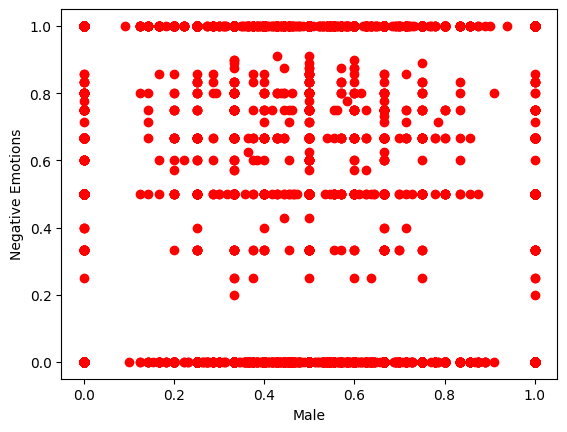

In [60]:
plt.xlabel("Male")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['Male'], y_train, color = 'red')
plt.show()

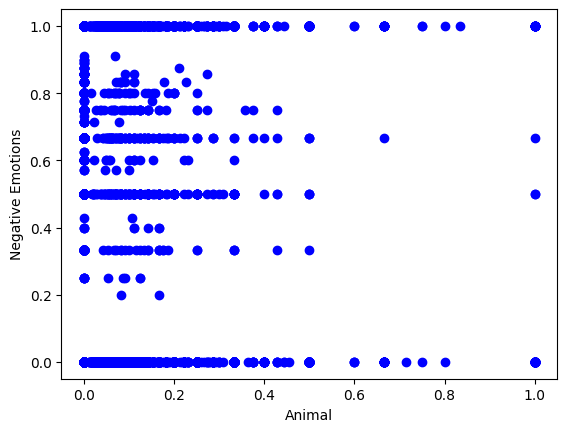

In [61]:
plt.xlabel("Animal")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['Animal'], y_train, color = 'blue')
plt.show()

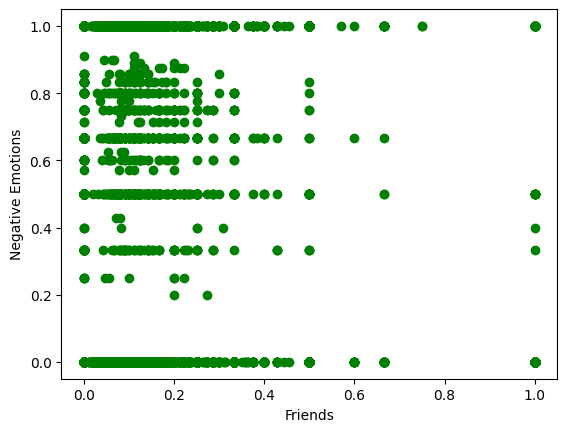

In [62]:
plt.xlabel("Friends")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['Friends'], y_train, color = 'green')
plt.show()

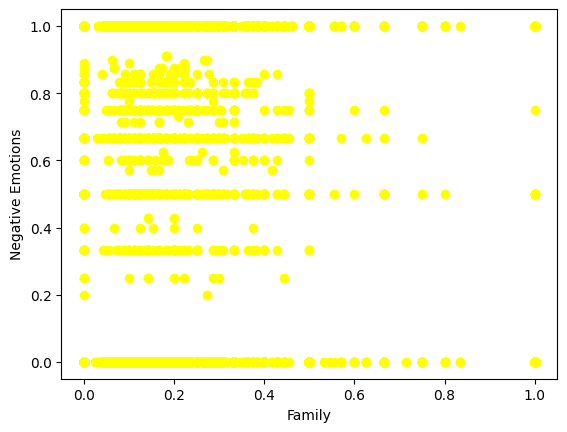

In [63]:
plt.xlabel("Family")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['Family'], y_train, color = 'yellow')
plt.show()

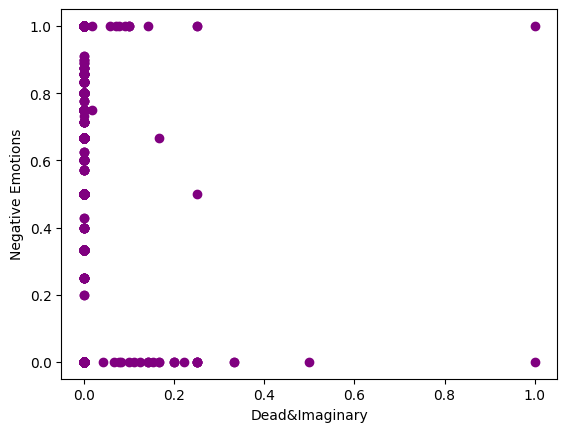

In [64]:
plt.xlabel("Dead&Imaginary")
plt.ylabel("Negative Emotions")
plt.scatter(X_train['Dead&Imaginary'], y_train, color = 'purple')
plt.show()

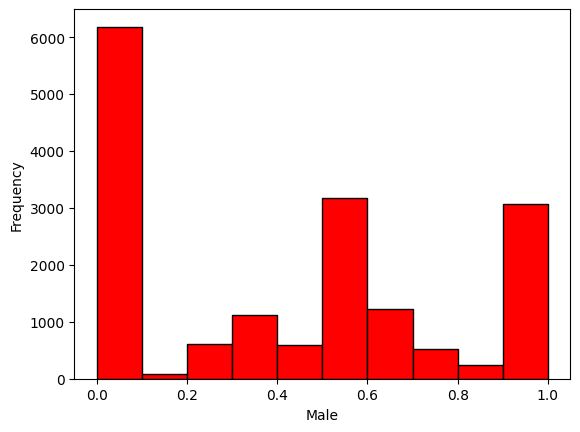

In [65]:
plt.hist(X_train['Male'], bins=10, color='red', edgecolor='black')  
plt.xlabel('Male')
plt.ylabel('Frequency')
plt.show()


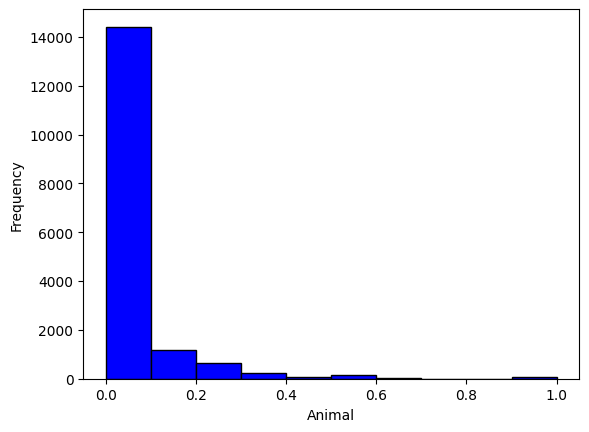

In [66]:

plt.hist(X_train['Animal'], bins=10, color='blue', edgecolor='black')  
plt.xlabel('Animal')
plt.ylabel('Frequency')
plt.show()

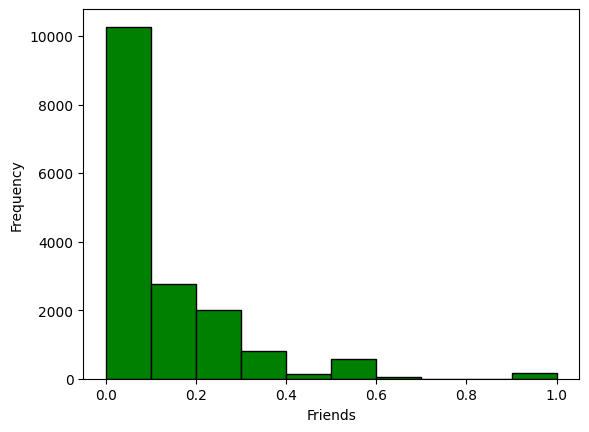

In [67]:
plt.hist(X_train['Friends'], bins=10, color='green', edgecolor='black') 
plt.xlabel('Friends')
plt.ylabel('Frequency')
plt.show()

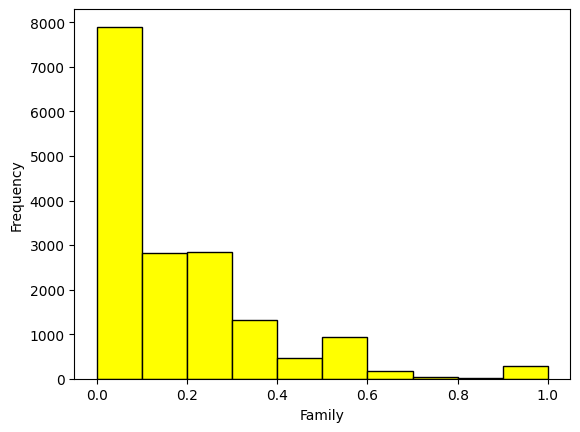

In [68]:
plt.hist(X_train['Family'], bins=10, color='yellow', edgecolor='black') 
plt.xlabel('Family')
plt.ylabel('Frequency')
plt.show()


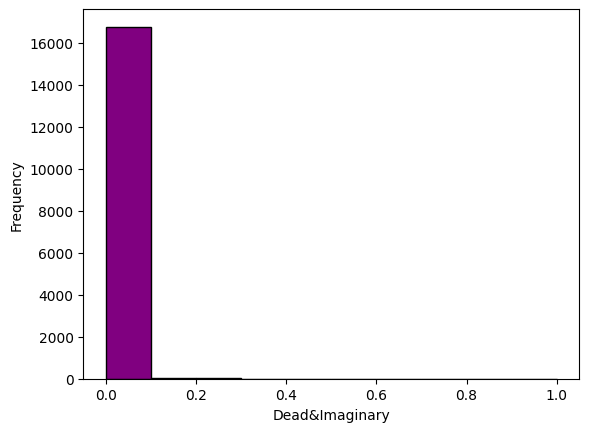

In [69]:
plt.hist(X_train['Dead&Imaginary'], bins=10, color='purple', edgecolor='black')  
plt.xlabel('Dead&Imaginary')
plt.ylabel('Frequency')
plt.show()

Checking for correlations

                      Male    Animal   Friends    Family  Dead&Imaginary  \
Male              1.000000 -0.056817  0.227725  0.021102       -0.014525   
Animal           -0.056817  1.000000 -0.009965 -0.019507       -0.004948   
Friends           0.227725 -0.009965  1.000000 -0.126890       -0.010402   
Family            0.021102 -0.019507 -0.126890  1.000000       -0.010552   
Dead&Imaginary   -0.014525 -0.004948 -0.010402 -0.010552        1.000000   
NegativeEmotions  0.021532 -0.005626  0.007019  0.026845       -0.010517   

                  NegativeEmotions  
Male                      0.021532  
Animal                   -0.005626  
Friends                   0.007019  
Family                    0.026845  
Dead&Imaginary           -0.010517  
NegativeEmotions          1.000000  


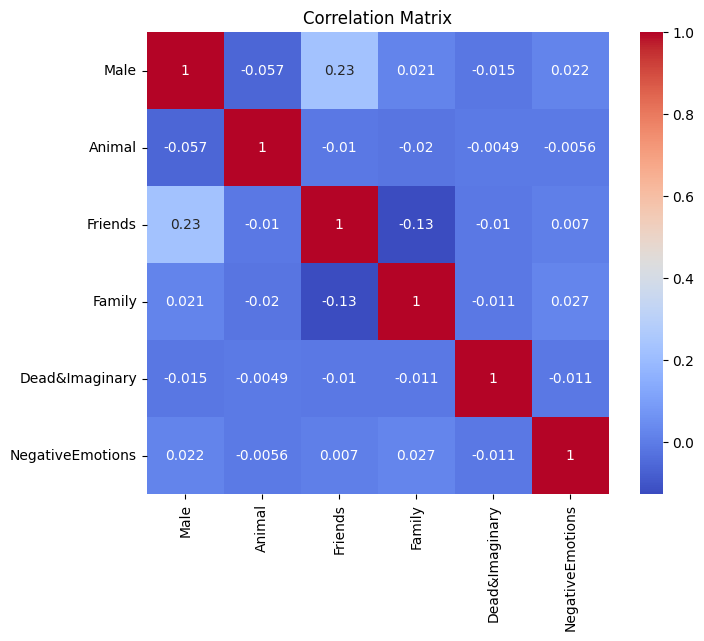

In [70]:
#correlation matrix
selected_columns = dreams[['Male', 'Animal', 'Friends', 'Family', 'Dead&Imaginary', 'NegativeEmotions']]

# Calculate the correlation matrix
correlation_matrix = selected_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

Exporting the processed training data frame to a csv file

In [71]:
training_df = X_train.copy()
training_df['NegativeEmotions'] = y_train
print(training_df.columns)
display(training_df.head())
training_df.to_csv("training_data.csv")

Index(['Male', 'Animal', 'Friends', 'Family', 'Dead&Imaginary',
       'NegativeEmotions'],
      dtype='object')


,Male,Animal,Friends,Family,Dead&Imaginary,NegativeEmotions
15345,0.500000,0.000000,0.166667,0.250000,0.0,0.0
8476,0.750000,0.055556,0.117647,0.176471,0.0,1.0
9052,0.000000,0.000000,0.250000,0.000000,0.0,1.0
17206,0.333333,0.000000,0.176471,0.235294,0.0,0.0
16188,0.250000,0.000000,0.142857,0.000000,0.0,1.0


Reflect changes on training set to test set

In [72]:
#Drop columns from test set to match the training set
X_test.drop(' dream_id', axis=1, inplace=True)
X_test.drop('dreamer', axis=1, inplace=True)
X_test.drop('gender', axis=1, inplace=True)
X_test.drop('description', axis=1, inplace=True)
X_test.drop('text_dream', axis=1, inplace=True)
X_test.drop('dream_language', axis=1, inplace=True)
X_test.drop('dream_date', axis=1, inplace=True)
X_test.drop('characters_code', axis=1, inplace=True)
X_test.drop('emotions_code', axis=1, inplace=True)
X_test.drop('aggression_code', axis=1, inplace=True)
X_test.drop('friendliness_code', axis=1, inplace=True)
X_test.drop('sexuality_code', axis=1, inplace=True)
X_test.drop('Aggression/Friendliness', axis=1, inplace=True)
X_test.drop('A/CIndex', axis=1, inplace=True)
X_test.drop('F/CIndex', axis=1, inplace=True)
X_test.drop('S/CIndex', axis=1, inplace=True)

In [73]:
!jupyter nbconvert --to script data_preprocessing.ipynb

[NbConvertApp] Converting notebook data_preprocessing.ipynb to script
[NbConvertApp] Writing 8469 bytes to data_preprocessing.py
